# <center> Projeto Grafos</center>

### Objetivo


Montar um grafo com as substações de energia e suas interligação, com o grafo pronto analisar as interligações, possiveis falhas, e pontos de melhoria da rede eletrica, em relação a disponibilidade e redundancia da rede.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##### Importando os dados

In [2]:
data_frame = pd.read_csv("./siget-contrato-modulolinhatransmissao-subestacaoorigem-subestacaodestino.csv", encoding="latin", sep=";")


##### Formatando, filtrando e limpando os dados

In [3]:
data_frame.dropna(inplace=True, how="any")
data_frame.drop(data_frame[data_frame["DscSitLinTms"] != "Ativa"].index, axis=0, inplace=True)
data_frame.drop(["DatGeracaoConjuntoDados","IdeMdl","IdeTipMdl","NomLongoSubestacaoOrigem" ,"NomLongoSubestacaoDestino"], axis=1, inplace=True)

colunas_arestas = ["id", "situacao", "nome", "circuito", "qtd_torres", "sub_origem", "sub_destino"]
arestas_df = pd.DataFrame(data_frame[["IdeLinTms","DscSitLinTms", "NomLinTms", "NumCcuLinTms", "QtdTorLinTms", "IdeSbeOri", "IdeSbeDsn" ]]).set_axis(colunas_arestas, axis=1).reset_index()

colunas = ["ide", "ideOns", "nome", "uf"]

vertices_origem = pd.DataFrame(data_frame[["IdeSbeOri", "IdeOnsSbeOrigem", "NomSubestacaoOrigem", "SigUFSubestacaoOrigem"]]).set_axis(colunas, axis=1)
vertices_destino = pd.DataFrame(data_frame[["IdeSbeDsn", "IdeOnsSbeDestino", "NomSubestacaoDestino", "SigUFSubestacaoDestino"]]).set_axis(colunas, axis=1)

vertices_df = pd.concat([vertices_origem, vertices_destino]).drop_duplicates().dropna(how="any").reset_index()


##### Montando o Grafo

In [4]:
v = list()

for i in vertices_df.index:
    linha = vertices_df.iloc[i]
    v.append( (linha["ide"], { "ideOns": linha["ideOns"], "nome": linha["nome"], "uf": linha["uf"]}) )


vertices = pd.Series(v)

v.clear()

In [5]:
grafo = nx.Graph()

grafo.add_nodes_from(vertices)

In [6]:
for i in arestas_df.index:
    linha = arestas_df.iloc[i]
    grafo.add_edge((linha["sub_origem"]), linha["sub_destino"], weight=linha["qtd_torres"])

#### Com o grafo pronto vamo observar algumas coisas:


- Se o grafo é conexo.
- O grau de centralidade.
- Se existe mais de um caminho para cada nó.


Primeiramente ver se o grafo é conexo. Utilizando a função **all_pair_node_connectivity** da biblioteca ***networkx*** pode-se conseguir essa informação. Rodei o algoritmo e guardei o resultado em um arquivo .csv chamado **matriz_conectividade.csv**, para não ter que executar novamente o algoritmo, de acordo com a documentação oficial, a função computa uma aproximação dos caminhos possiveis entre cada par de vertices. Desta forma temos:

In [7]:
# x = nx.algorithms.all_pairs_node_connectivity(grafo) # Rodando o algoritmo
# pd.DataFrame(x).to_csv("matriz_conectividade.csv") # Criando o arquivo csv

matriz_conectividade = pd.read_csv("matriz_conectividade.csv") # Lendo o arquivo criado 
matriz_conectividade.set_index("vertices", inplace=True) # Arrumando o index


In [8]:
# funções de apoio
def vertice_alcancaveis(ide):
    return matriz_conectividade.loc[ide].loc[matriz_conectividade.loc[ide] != 0]

def busca_nome(nome):
    return int(vertices_df["ide"].loc[vertices_df["nome"] == nome].iloc[0])




In [9]:
matriz_conectividade

,37,153,203,326,362,427,576,597,605,676,...,2607,3172,3367,3375,55,3369,3370,1458,1468,4483
vertices,,,,,,,,,,,,,,,,,,,,,
153,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,2.0,0.0,0.0,0.0,NaN,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
427,2.0,0.0,0.0,0.0,2.0,NaN,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0
1458,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,1.0
1468,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0


Por exemplo se pegarmos o primeiro valor da matriz_conectividade que seria um vertice qualquer, podemos observar quais vertices tem caminhos para ele.


In [10]:
menos_conexões = matriz_conectividade.index[0]

Pode-se observar que é uma subestação chamada de milagres no estado do ceara, provavelmente uma substação que alimenta uma cidade

In [11]:
def verificar_caminhos(vertice):
    vert = matriz_conectividade.loc[vertice].loc[matriz_conectividade.loc[vertice] != 0].dropna().index

    x =[]

    for i in vert:
        for i in nx.algorithms.all_simple_paths(grafo, vertice, int(i)):
            print(i)
            x.append(grafo.subgraph(i))
    
    return x

[np.int64(153), np.int64(3376), np.int64(163), np.int64(996)]
[np.int64(153), np.int64(3376)]
[np.int64(153), np.int64(902)]
[np.int64(153), np.int64(3376), np.int64(163)]


{np.int64(3376): Text(-0.017891452318304992, 0.022897705439772327, 'CRATO II'),
 np.int64(153): Text(0.548997039075124, -0.6322316792214889, 'MILAGRES'),
 np.int64(163): Text(-0.5666655836007418, 0.6490744591349475, 'TAUA II'),
 np.int64(996): Text(-0.8359646330736995, 0.9602595146467712, 'PICOS'),
 np.int64(902): Text(0.8715246299176224, -1.0, 'COREMAS')}

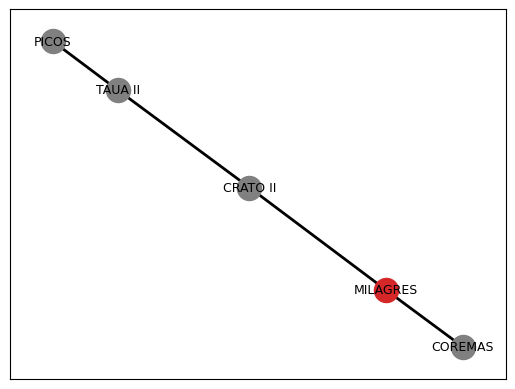

In [12]:
v = verificar_caminhos(menos_conexões)
x = nx.compose_all(v)


pos = nx.spring_layout(x, seed=335, k=0.3)

nx.draw_networkx_nodes(x, pos, nodelist=[menos_conexões], node_color="tab:red")
nx.draw_networkx_nodes(x, pos, nodelist=x.nodes - {menos_conexões}, node_color="gray")

nx.draw_networkx_edges(x, pos, width=2, alpha=1.0, edgelist=x.edges)

labels = {}
for i in x.nodes:
    labels[i] = x.nodes[i]["nome"]


nx.draw_networkx_labels(x,pos,labels=labels, font_size=9)

Oque a busca em largura nos diz sobre esse subgrafo

{np.int64(153): Text(0.3726616887667578, 0.21930991417009876, 'MILAGRES'),
 np.int64(902): Text(1.0, 0.835916119825228, 'COREMAS'),
 np.int64(3376): Text(-0.2597010740186313, -0.39836007642258203, 'CRATO II'),
 np.int64(163): Text(-0.39891805629053334, -0.2620640430159061, 'TAUA II'),
 np.int64(996): Text(-0.7140425584575931, -0.3948019145568395, 'PICOS')}

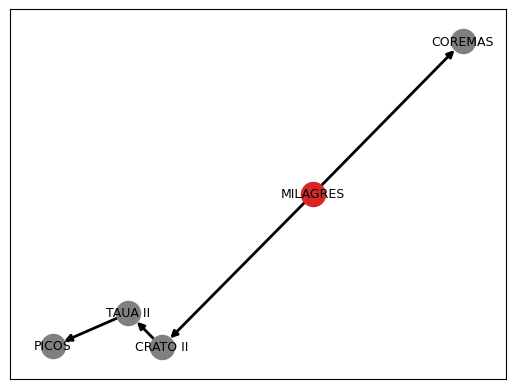

In [13]:
x = nx.bfs_tree(grafo, menos_conexões, depth_limit=10)

pos = nx.spring_layout(x, seed=100, k=0.3)

nx.draw_networkx_nodes(x, pos, nodelist=[menos_conexões], node_color="tab:red")
nx.draw_networkx_nodes(x, pos, nodelist=x.nodes - {menos_conexões}, node_color="gray")

nx.draw_networkx_edges(x, pos, width=2, alpha=1.0, edgelist=x.edges)

labels = {}
for i in x:
    labels[i] = grafo.nodes[i]["nome"]
    # print(i)


nx.draw_networkx_labels(x,pos,labels=labels, font_size=9)

Bom, ao que parece essa região está isolada do resto do grafo, provavelmente algum problema com a base de dados ou com a limpeza realizada. Usarei agora a subestação de campina grande.

In [14]:
campina_grande_II = busca_nome("C.GRANDE II")

len(vertice_alcancaveis(campina_grande_II))

345

Pode-se observar que a subestação campina grande II tem mais de 345 nodos que podem ser acessados a partir dela. Vamos observar o menor caminho entre sobradinho e campina grande, e quantos caminho possiveis existem entre a substação de campina grande e a de sobradinho(Usina hidroeletrica). **Dijkstra menor caminho**

{np.int64(897): Text(-0.7206144382077608, -0.7013821328984802, 'C.GRANDE II'),
 np.int64(3202): Text(0.5183711951125888, 0.4963150098214885, 'JUAZEIRO III'),
 np.int64(3112): Text(-0.3366952631110346, -0.30932923562723225, 'GARANHUNS II'),
 np.int64(3090): Text(-0.39124063109856777, -0.3660600001828933, 'C.GRANDE III'),
 np.int64(980): Text(-0.06982086269522449, -0.05014849665940048, 'US. L.GONZAGA'),
 118: Text(1.0, 0.9306048555465167, 'U.SOBRADINHO')}

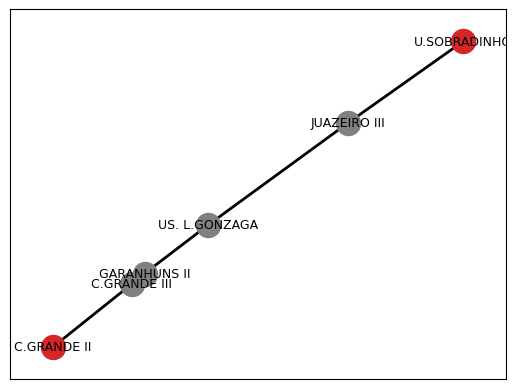

In [42]:
# achar a substação de sobradinho
sobradinho = busca_nome("U.SOBRADINHO")


# Dijkstra sobradinho campina grande II

menor_caminho = nx.algorithms.dijkstra_path(grafo, sobradinho, campina_grande_II)
x = grafo.subgraph(menor_caminho)

pos = nx.spring_layout(x, seed=335, k=0.3)

nx.draw_networkx_nodes(x, pos, nodelist=[campina_grande_II, sobradinho], node_color="tab:red")
nx.draw_networkx_nodes(x, pos, nodelist=x.nodes - {campina_grande_II,sobradinho}, node_color="gray")

nx.draw_networkx_edges(x, pos, width=2, alpha=1.0, edgelist=x.edges)

labels = {}
for i in x.nodes:
    labels[i] = x.nodes[i]["nome"]


nx.draw_networkx_labels(x,pos,labels=labels, font_size=9)

Plotando um grafo com bfs para se espalhar o maximo possivel

{897: Text(-0.9605752578553699, -0.4474766173750585, 'C.GRANDE II'),
 118: Text(0.8017521476236465, 0.6750063078570933, 'U.SOBRADINHO')}

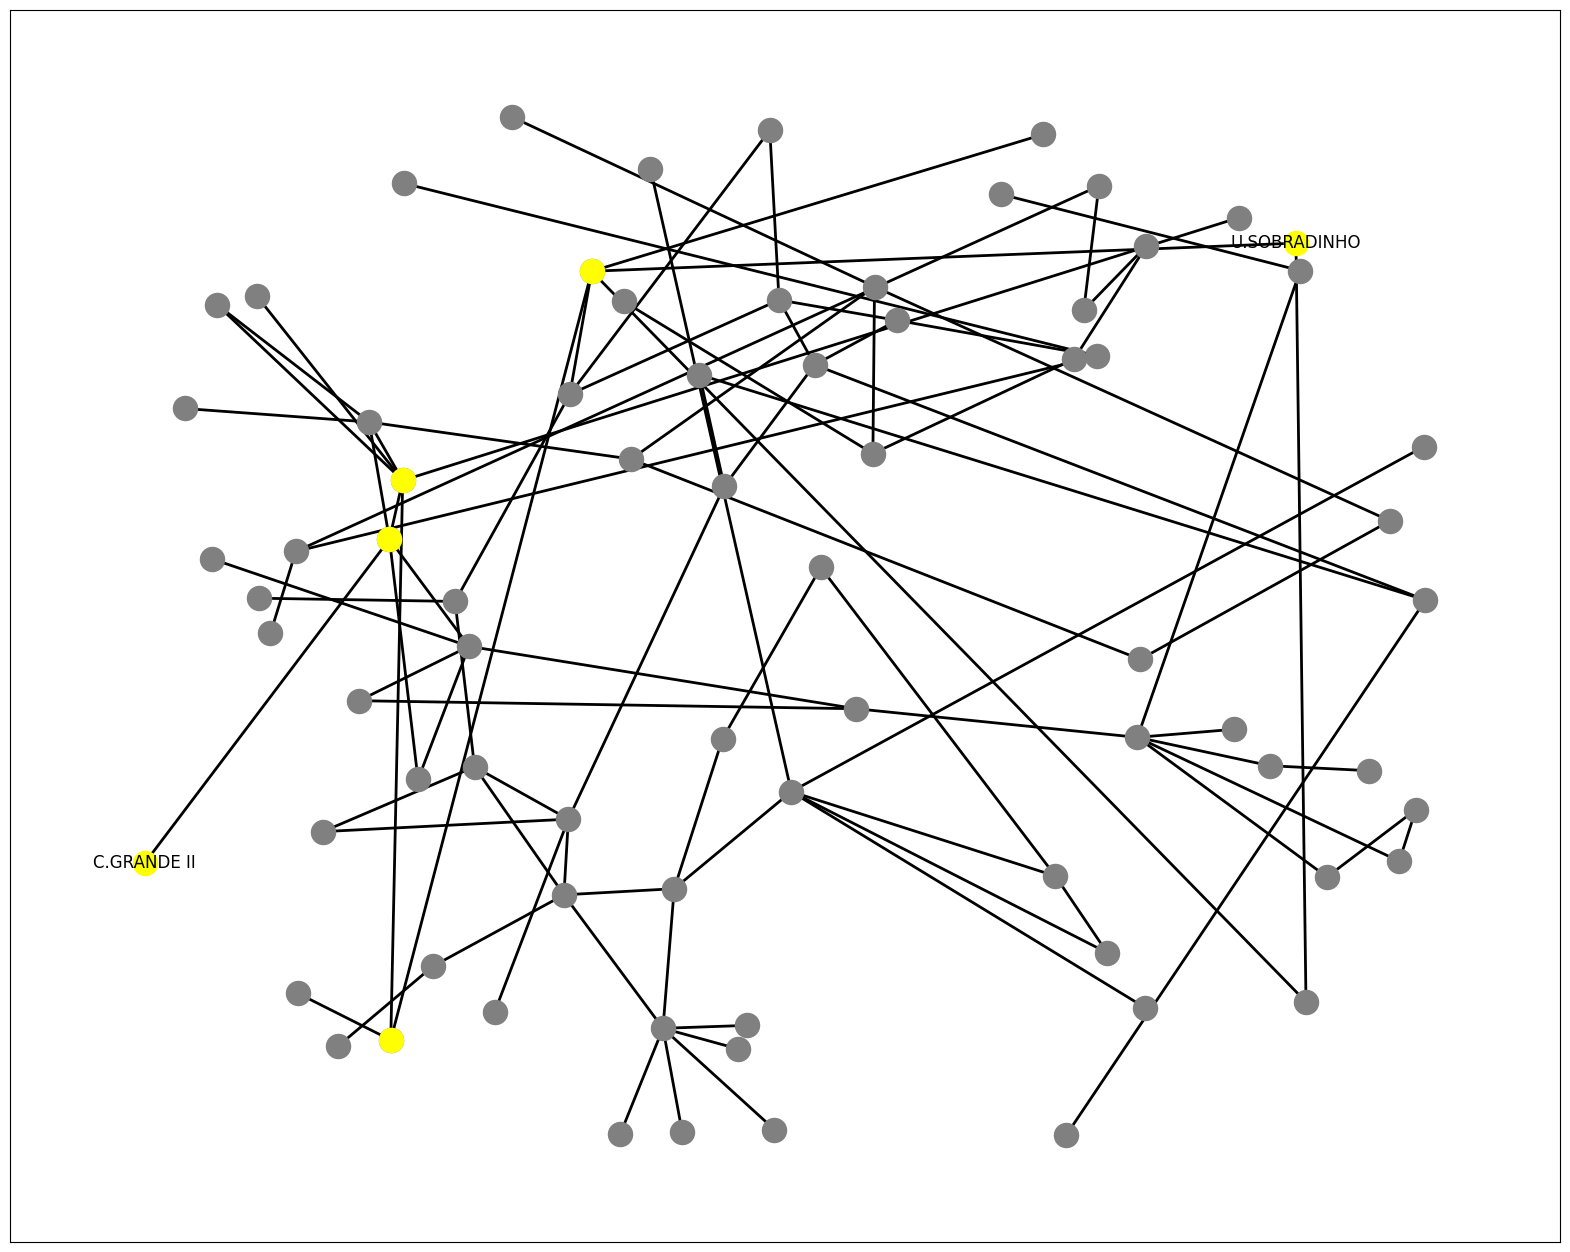

In [57]:
x = nx.algorithms.dfs_tree(grafo, sobradinho, depth_limit=10)
y = nx.algorithms.dfs_tree(grafo, campina_grande_II, depth_limit=10)

# cont = 0
# qtd_caminhos = 50
# g5 = []
# for i in x:
#     cont += 1
#     if cont == qtd_caminhos:
#         break

#     g5.append(grafo.subgraph(i))
        

# x = nx.compose_all(g5)
x = grafo.subgraph(x)

fig, ax = plt.subplots(1,1,figsize=(20,16))


pos = nx.spring_layout(x, seed=126789, k=2)

# nx.draw_networkx_nodes(x, pos, nodelist=list(menor_caminho), node_color="yellow")
nx.draw_networkx_nodes(x, pos, nodelist=x.nodes - {campina_grande_II,sobradinho}, node_color="gray",ax=ax)
nx.draw_networkx_nodes(x, pos, nodelist=list(menor_caminho), node_color="yellow")


nx.draw_networkx_edges(x, pos, width=2, alpha=1.0, edgelist=x.edges,ax=ax)
nx.draw_networkx_labels(x,pos, labels={campina_grande_II: x.nodes[campina_grande_II]["nome"], sobradinho : x.nodes[sobradinho]["nome"]},ax=ax)

### Grau de centralidade

Como é possivel ver, não temos nenhum vertice sem aresta conectada a ele, mas, como observado acima nas substações do Ceará, o grafo é desconexo. Quanto a centralidade é possivel ver quantos vizinho cada vertice tem usando o atributo **degree** disponibilizado pela biblioteca. Coloquei em um dataframe pandas para melhor vizualização.

In [17]:
grau = pd.DataFrame(grafo.degree(), columns=["ide", "grau"]).set_index("ide").sort_values(by="grau", ascending=False)

In [18]:
grau.head(10)

,grau
ide,
1568,8
3111,7
617,7
3150,6
676,6
3201,6
4398,6
2843,6
597,6


In [19]:
grau.tail(10)

,grau
ide,
478,1
630,1
3367,1
3375,1
55,1
3369,1
3370,1
1458,1
1468,1


Plotando o grafo em relação ao grau de cada vertice (degree centrality)

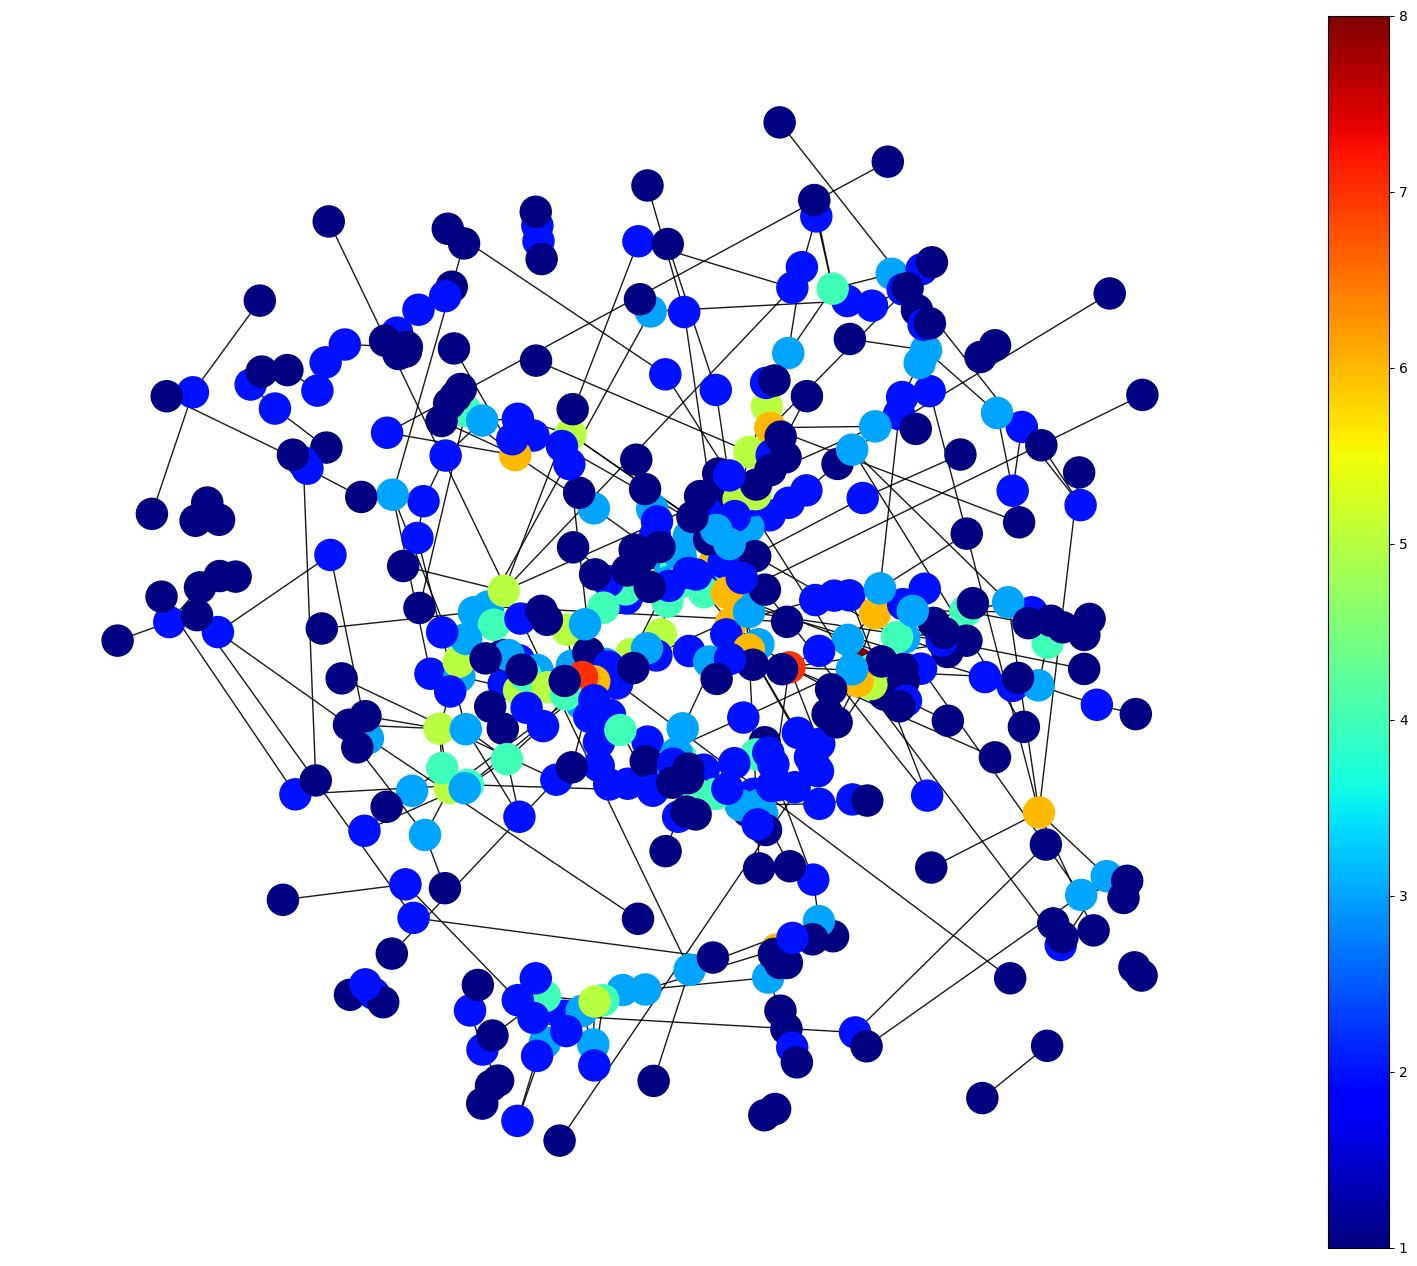

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

pos = nx.spring_layout(grafo,seed=123456789,k=0.3)

color = list(dict(grafo.degree()).values())

nx.draw_networkx_edges(grafo, pos, alpha=0.9, ax=ax)
nodes = nx.draw_networkx_nodes(grafo, pos, node_color=color, node_size=500, cmap=plt.cm.jet, ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()



Por grau de vertice temos que as partes mais quentes tem mais conexões, isso quer dizer que ou é uma substação de uma usinas(ou um complexo), ou está em um lugar com muita atividade industrial, ou grandes centros urbanos que tendem a ter varias subestações para alimentar a cidade. E as mais frias tem menos conexões ou seja menor grau de redundância, que pode indica baixa população e produção industrial fraca. Os vertices desconexos da massa central do grafo provavelmente foram por problema na base de dados

### Verificação em relação a excentricidade

É definido como a maior distancia entre dois nós conectados, primeiramente como o grafo é desconexo, será gerado um subgrafo a partir de campina grande.

In [21]:
cg = vertice_alcancaveis(campina_grande_II)


vertices = nx.algorithms.bfs_tree(grafo, source=sobradinho, depth_limit=len(cg)*2)

sub_grafo_cg = grafo.subgraph(vertices)

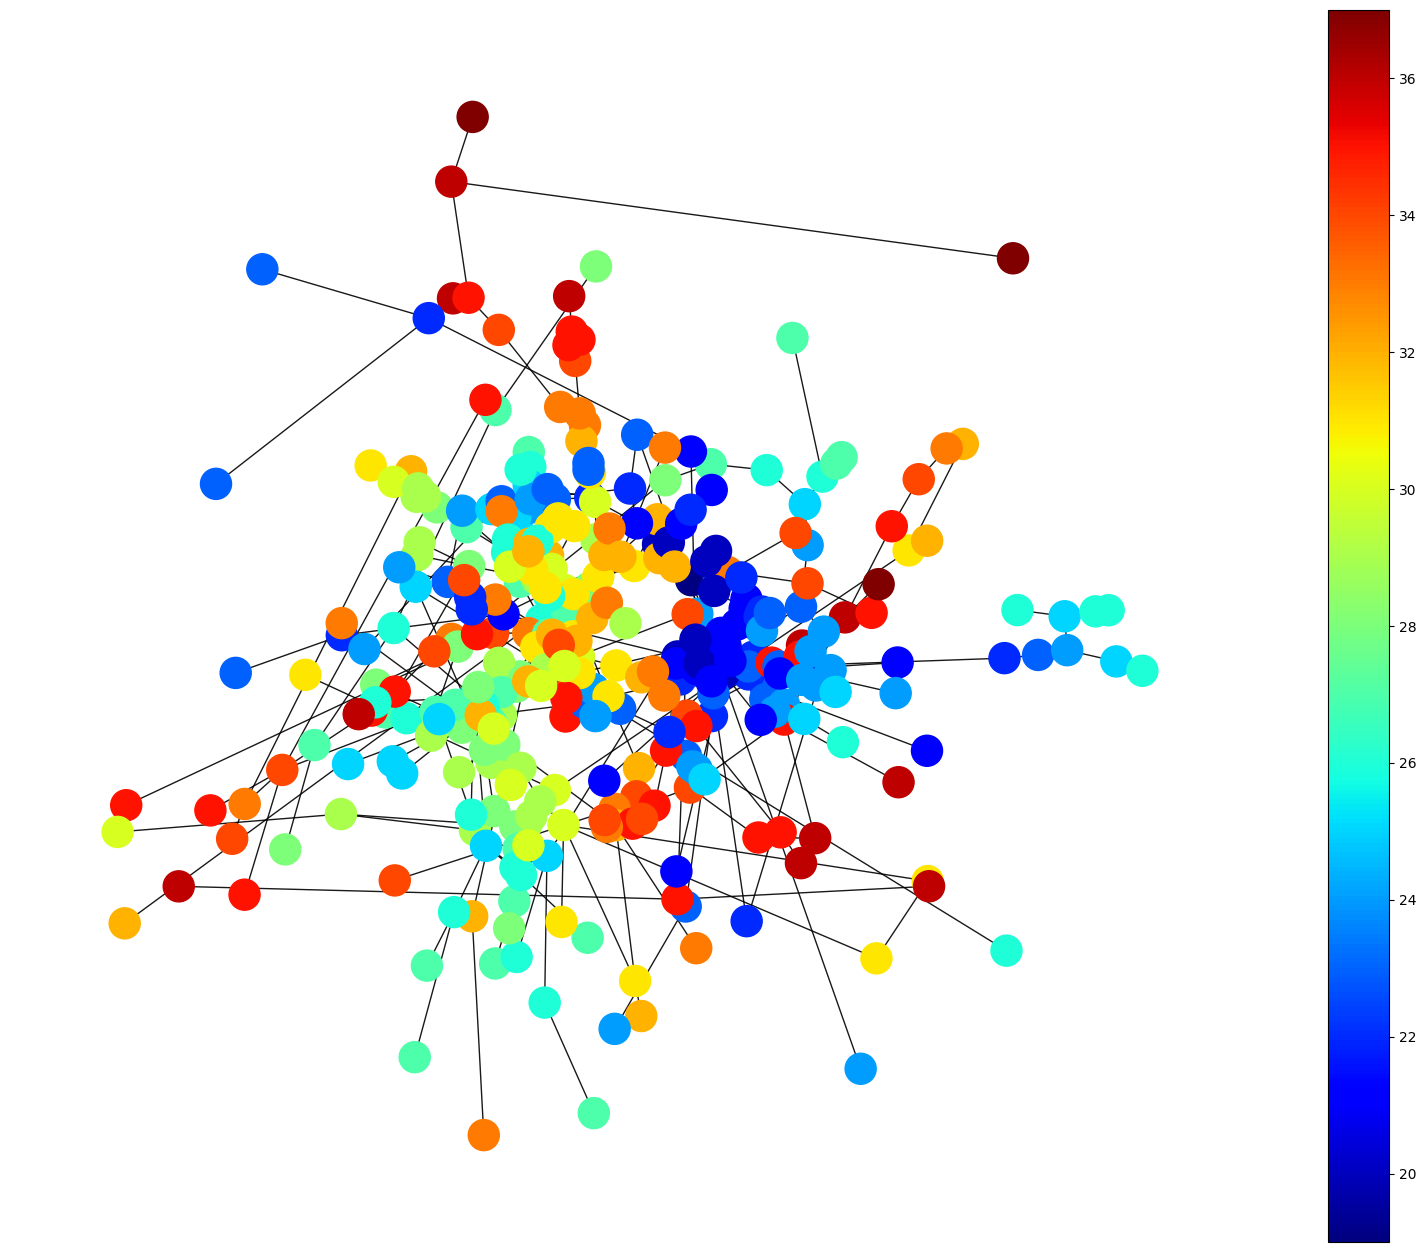

In [22]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

pos = nx.spring_layout(sub_grafo_cg,seed=123456789,k=0.3)
exc = nx.eccentricity(sub_grafo_cg)
color = list(dict(exc).values())

nx.draw_networkx_edges(sub_grafo_cg, pos, alpha=0.9, ax=ax)
nodes = nx.draw_networkx_nodes(sub_grafo_cg, pos, node_color=color, node_size=500, cmap=plt.cm.jet, ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()


Quanto maior a excentricidade, maior a distancia e menos acessivel o vertice é, ou seja existem menos caminhos alternativos e uma maior distância de transmissão, oque leva a um perigo maior de interrupção no serviço de energia. É diferente do grau de centralização pois leva em consideração os pesos das arestas, que no caso desse grafo é a quantidade de torres de transmissão que existem entre duas substações, ou seja mais torres, mais possiveis pontos de problema.

In [23]:
diametro = nx.diameter(sub_grafo_cg)

print("Diametro do grafo é igual a {}".format(diametro))

for k in exc.keys():
    if(exc[k] >= diametro):
        print(sub_grafo_cg.nodes[k]["nome"], end=" - ")
    

Diametro do grafo é igual a 37
CASCAVEL - MACEIO II - F.IGUACUNORTE - 

Como visto o diametro do grafo é igual a 37 e as três substações seriam as de mais dificil acesso, ou seja mais vulneraveis a problemas de distribuição de energia.
Veremos Maceio II

In [24]:
maceio_II = busca_nome("MACEIO II")

{np.int64(897): Text(-0.9006895768328559, -0.5741859080245844, 'C.GRANDE II'),
 np.int64(3202): Text(-0.21430031876322425, 0.43483705036281217, 'JUAZEIRO III'),
 np.int64(1410): Text(0.8113391462784487, 0.4765227564862298, 'PARAISO'),
 np.int64(1797): Text(0.13432062569221057, 1.0, 'JARDIM'),
 np.int64(16): Text(-0.681578401965242, 0.17726352018380118, 'MESSIAS'),
 np.int64(3090): Text(0.3413344223989812, -0.57347851628639, 'C.GRANDE III'),
 np.int64(19): Text(0.03717833578674566, 0.6717310939180624, 'PENEDO'),
 np.int64(915): Text(0.6748310360997632, -0.7329410950008506, 'ANGELIM II'),
 np.int64(21): Text(-0.47048911274218735, 0.7410468689600309, 'RIO LARGO II'),
 np.int64(916): Text(-0.7128895268207934, 0.843738246799807, 'ANGELIM'),
 np.int64(3092): Text(0.3890779860818134, -0.41772231096810997, 'CEARA MIRIM II'),
 np.int64(3091): Text(0.0977018000843439, -0.3140671263979549, 'JOAO CAMARA III'),
 np.int64(3224): Text(-0.09528924211606356, 0.3356888114262916, 'OUROLANDIA II'),
 np.in

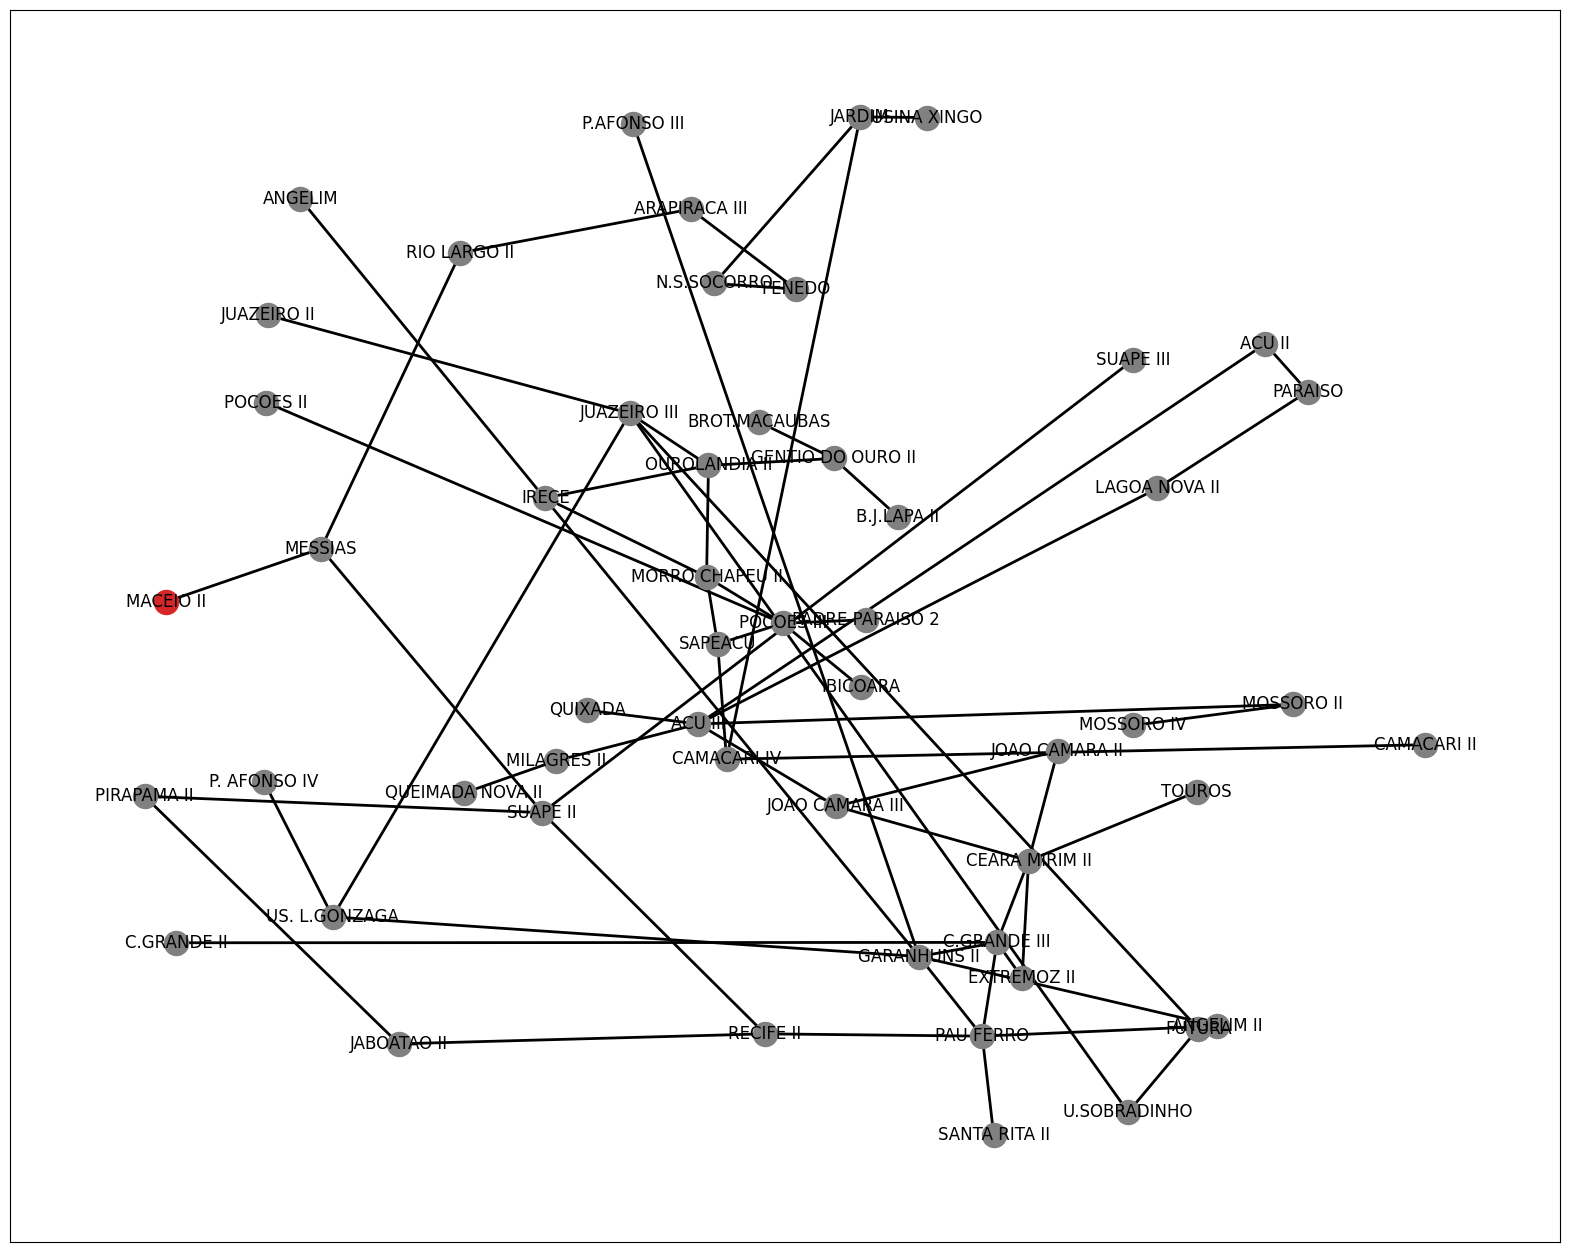

In [25]:
tree_maceio = sub_grafo_cg.subgraph(nx.algorithms.bfs_tree(grafo,maceio_II, depth_limit=10))
x = tree_maceio

fig, ax = plt.subplots(1,1,figsize=(20,16))


pos = nx.spring_layout(x, seed=126789, k=2)

nx.draw_networkx_nodes(x, pos, nodelist=[maceio_II], node_color="tab:red",ax=ax)
nx.draw_networkx_nodes(x, pos, nodelist=x.nodes - {maceio_II}, node_color="gray",ax=ax)

nx.draw_networkx_edges(x, pos, width=2, alpha=1.0, edgelist=x.edges,ax=ax)
labels = {}
for i in tree_maceio.nodes:
    labels[i] = tree_maceio.nodes[i]["nome"]

nx.draw_networkx_labels(x,pos, labels=labels,ax=ax)

Como pode-se ver a substração **MACEIO II** tem uma única ponte entre ela e o resto da rede, ou seja se ocorrer algum problema na subestação de **MESSIAS** inevitávelmente MACEIO II e todos os consumidores que dependem da substação estariam com a energia elétrica cortada. E considerando que o grafo gerado é um subgrafo com vertices disponibilizados pelo algorimo de busca em largura, é visivel que existe problemas de redundancia nessa rede e que a energia pode facilmente se tornar indisponivel para essa subestação.

# <center> Considerações finais</center>

Primeiramente, os dados provavelmente estão incompletos ou desatualizados, oque é compreesivel até pq a infraestrutura de energia elétrica é algo de vital importância para a segurança nacional, e simplesmente disponibilizar uma visão completa dela ao publico não seria um decisão muito inteligente. Mesmo assim busquei outros dados para ver se conseguia adicionar mais coisas e não achei, e os que achei não me davam oque eu queria. Mesmo não filtrando por ativo, temos resultados semelhantes(ver relatório_grafos_naoAtivos)

Bom obviamente existem varias outras coisas que podem ser feitas com o grafo nessa forma, por exemplo foi detectado um possivel falha de infraestrutura na substação de maceio, tenho plena convicção que até mesmo pelo nome da substação e por ser uma capital de um estado exista mais de uma conexão, além de messias para garantir uma distribuição adequada de energia para a população da capital. 